# What is the trend and factors influencing the enrolment in undergraduate programs at LSE? 


# Table of Contents 

[Introduction](#Introduction)

[Data Description](#Data-Description)

[Research Questions](#Research-Questions)

[1.0. Data Acquisition](#1.0.-Data-Acquisition)
* [1.1. Fetching data for course numbers](#1.1.-Fetching-data-for-course-numbers)
* [1.2. Data From tableu, containing the number of students in each academic year](#1.2.-Data-From-tableu,-containing-the-number-of-students-in-each-academic-year)
* [1.3. Data from HEFA - shows how many staff members in all unis](#1.3.-Data-from-HEFA---shows-how-many-staff-members-in-all-unis)
* [1.4. Fetching Data for each department offer rates](#1.4.-Fetching-Data-for-each-department-offer-rates)
* [1.5. Reddit API](#1.5.-Reddit-API)
* [1.6. Terms related to LSE](#1.6.-Terms-related-to-LSE)

[2.0. Data preparation and exploration](#2.0.-Data-preparation-and-exploration) 
* [2.1. Cleaning course_numbers_year_df](#2.1.-Cleaning-course_numbers_year_df)
  * [2.2.1. Cleaning student data](#2.2.1.-Cleaning-student-data)
  * [2.2.2. Combining student data from all years](#2.2.2.-Combining-student-data-from-all-years)
* [2.3. Cleaning staff data](#2.3.-Cleaning-staff-data)

[3.0. Data visualisation](#3.0.-Data-visualisation)
* [3.1. Exploratory data analysis](#3.1.-Exploratory-data-analysis)
* [3.2. Q1: Is there a change in the number of applicants and offer rates from LSE?](#3.2.-Q1:-Is-there-a-change-in-the-number-of-applicants-and-offer-rates-from-LSE?)
  * [3.2.1. Applicants vs Offer Yearly Proportions](#3.2.1.-Applicants-vs-Offer-Yearly-Proportions)
  * [3.2.2. Departmental Offer Rates](#3.2.2.-Departmental-Offer-Rates)
* [3.3. Q2: How has the overall dropout rate at LSE changed over time?](#3.3.-Q2:-How-has-the-overall-dropout-rate-at-LSE-changed-over-time?)
  * [3.3.1. Fetching data for overall dropout rates](#3.3.1.-Fetching-data-for-overall-dropout-rates)
  * [3.3.2. Plotting the overall drop out rate at LSE from 2017 to 2023](#3.3.2.-Plotting-the-overall-drop-out-rate-at-LSE-from-2017-to-2023)
  * [3.3.3. Ploting the change in dropout rates between 1st and 2nd year from 2017-2023](#3.3.3.-Ploting-the-change-in-dropout-rates-between-1st-and-2nd-year-from-2017-2023)
  * [3.3.4. Ploting the change in dropout rates between 2nd and final year from 2017-2023](#3.3.4-Ploting-the-change-in-dropout-rates-between-2nd-and-final-year-from-2017-2023)
  * [3.3.5. Getting data for the course drop out rates](#3.3.5.-Getting-data-for-the-course-drop-out-rates)
  * [3.3.6. Ploting the top 10 courses with the highest drop out rates](#3.3.6.-Ploting-the-top-10-courses-with-the-highest-drop-out-rates)
  * [3.3.7. Ploting the top 10 courses with the highest drop out rates from 2nd to final year](#3.3.7.-Ploting-the-top-10-courses-with-the-highest-drop-out-rates-from-2nd-to-final-year)
* [3.4. Q3: Is there a correlation between the number of staff members and enrolment in LSE?](#3.4.-Q3:-Is-there-a-correlation-between-the-number-of-staff-members-and-enrolment-in-LSE?)
  * [3.4.1. LSE Enrollment Overview: Top 10 Departments](#3.4.1.-LSE-Enrollment-Overview:-Top-10-Departments)
  * [3.4.2. Staffing Trends Over Time and Key Year Comparisons (2018, 2020, 2023)](#3.4.2.-Staffing-Trends-Over-Time-and-Key-Year-Comparisons-(2018,-2020,-2023))

[Conclusion](#Conclusion)
    
[References](#References)

# Introduction

# Data Description

# Research Questions 

1) Is there a change in the number of applicants and offer rates from LSE?
   
2) How has the overall dropout rate at LSE changed over time?

3) Is there a correlation between the number of staff members and enrolment in LSE?

## 1.0. Data Acquisition

### 1.1. Fetching data for course numbers

In [287]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

def get_course_numbers(url, year):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    content = soup.find("div", attrs={"class": "right-container"})
    links = content.find_all("a", href=True)
    course_list = []
    for link in links:
        text = link.text.strip()
        if len(text) > 2:
            course_list.append(text[0:6].strip())

    service = Service("chromedriver.exe")
    driver = webdriver.Chrome(service=service)

    course_enrolment = {}

    for course in course_list:
        course_url = f"https://www.lse.ac.uk/resources/calendar{year}-{year+1}/courseGuides/{course[0:2]}/{year}_{course}.htm"
        driver.get(course_url)
        try:
            total_students = WebDriverWait(driver, 0.15).until(
                EC.presence_of_element_located((By.XPATH, "//div[@id='keyFacts-Content']/p[2]"))
            ).text
            department = course[0:2]
            course_enrolment[course] = (total_students.split(":")[-1].strip(), department)
            
        except:
            #print(f"cant find {course} in {year}")
            pass

    driver.quit()
    df = pd.DataFrame.from_dict(course_enrolment, orient="index", columns=["Enrolment", "Department"])
    return df
course_numbers_2024_df = get_course_numbers("https://www.lse.ac.uk/resources/calendar2024-2025/courseGuides/undergraduate.htm", 2024)
course_numbers_2023_df = get_course_numbers("https://www.lse.ac.uk/resources/calendar2023-2024/courseGuides/undergraduate.htm", 2023)
course_numbers_2022_df = get_course_numbers("https://www.lse.ac.uk/resources/calendar2022-2023/courseGuides/undergraduate.htm", 2022)
course_numbers_2021_df = get_course_numbers("https://www.lse.ac.uk/resources/calendar2021-2022/courseGuides/undergraduate.htm", 2021)
course_numbers_2020_df = get_course_numbers("https://www.lse.ac.uk/resources/calendar2020-2021/courseGuides/undergraduate.htm", 2020)
course_numbers_2019_df = get_course_numbers("https://www.lse.ac.uk/resources/calendar2019-2020/courseGuides/undergraduate.htm", 2019)
course_numbers_2018_df = get_course_numbers("https://www.lse.ac.uk/resources/calendar2018-2019/courseGuides/undergraduate.htm", 2018)
course_numbers_2017_df = get_course_numbers("https://www.lse.ac.uk/resources/calendar2017-2018/courseGuides/undergraduate.htm", 2017)
course_numbers_2016_df = get_course_numbers("https://www.lse.ac.uk/resources/calendar2016-2017/courseGuides/undergraduate.htm", 2016)

The code above goes to each undergraduate calendar year. For each calendar year it goes to every module offered in that year and goes to its calendar page, where infomration such as topics taught, the cap on the number of students taking the course and the number of students taking the course the academic year before are contained. The code uses beautiful soup to scrape all the links in the calendar page. Then it turns it into a dictionary with the course code and link. Then we strip the text to get just the course code. Now we use the fact that every calendar page is almost identical and we change the year and the course depending on what we are looping through. We then want to scrape the number of students in that course. When using beautiful soup we could not get the information from that section of th webpage, perhaps because it was not html. One of our group members had experience with selenium, so we instead used selenium which is able to scrape more dynamic webpages. We open a chrome browser using selenium and locate the section containing the number of students in the course. The chromedriver waits 0.15 seconds before going to the next course. This may be problematic as some webpages may take longer to run on slower devices. However, we have limited it to 0.15 as most, if not all, load much faster than that and we want the code to not run for a really long time. A lot of courses do not have a calendar page in some years, so by limiting it 0.15 we limit the time the code runs. Since the webpages are not very intensive and is basic it should load much faster than 0.15. We add it to a dictionary with the course name and the enrolement. Once that courses in that year are exhausted we convert it into a DF and return it. 

In [290]:
#Storing here as csv so u dont need to run code
course_numbers_2024_df.to_csv('data/course_numbers_2024.csv')
course_numbers_2023_df.to_csv('data/course_numbers_2023.csv')
course_numbers_2022_df.to_csv('data/course_numbers_2022.csv')
course_numbers_2021_df.to_csv('data/course_numbers_2021.csv')
course_numbers_2020_df.to_csv('data/course_numbers_2020.csv')
course_numbers_2019_df.to_csv('data/course_numbers_2019.csv')
course_numbers_2018_df.to_csv('data/course_numbers_2018.csv')
course_numbers_2017_df.to_csv('data/course_numbers_2017.csv')
course_numbers_2016_df.to_csv('data/course_numbers_2016.csv')

The webscraping codes takes a while to run and can take longer depending on the device it is run on. So once one member runs it we store it as a csv so it is easier to use thte data without having to wait for the code to finish running.

 ### display the data

In [294]:
course_numbers_2024_df.head(5)


,Enrolment,Department
AC102,564,AC
AC103,256,AC
AC105,115,AC
AC106,115,AC
AC205,Unavailable,AC


### 1.2. Data From tableu, containing the number of students in each academic year

Here 2016 data was identical to 2017 so we decided to erase 2016 data.

In [298]:
import tabula # you need to first install it
import warnings
warnings.simplefilter("ignore")
student_data_dict = {}
for year in [2016,2018,2019,2020,2021,2022,2023]:
    dfs_in_list = tabula.read_pdf(f"data/student_data_{year}.pdf", pages="all")
    df = pd.concat(dfs_in_list, ignore_index=True)
    student_data_dict[year] = df

    

In [300]:
student_data_dict[2016].to_csv("Control.csv")

This code imports tabula and warnings. Tabula is used to extract the data from a pdf format, and warnings was used to remove the uneeded red text displayed when running the code. The code goes through each of the tables for each year, in pdf format, and uses tabula to read them. Then it creates a a dictionary of dataframes, with the years as the key and the df as a value. This data contains the number of students in each academic year in each programme, every year. So we can see how many people are in first,second and third year. This can be used to calculate how many people drop out as well, by seeing if there was a change from the number of people in second year in that department last year year to the most current year for example.

Here 2016 data would cause errors. After trying to rewdownload and run the code a couple times we decided to take it out as it was too problematic and we already had a sufficient number of years

### 1.3. Data from HEFA - shows how many staff members in all unis

In [304]:
staff_data_dict = {}
for year in [2016,2017,2018,2019,2020,2021,2022,2023]:
    df = pd.read_csv(f"data/staff_data_{year}.csv", skiprows=14)
    staff_data_dict[year] = df



This data from HEFA contains the total staff members in each university for each academic year. This data was already clean and in a csv format. However, the first few lines contained text about the data which we did not need to store in the table, so we used the skiprows attribute to only get the data

In [307]:
staff_data_dict[2018]

,UKPRN,HE Provider,"Managers, directors and senior officials",Professional occupations,Associate professional occupations,Clerical and manual occupations,Total academic staff
0,10007783.0,The University of Aberdeen,0,"1,425",5,0,"1,430"
1,10007849.0,Abertay University,0,210,5,0,215
2,10007856.0,Aberystwyth University,0,745,5,0,750
3,10000163.0,AECC University College,0,55,0,0,55
4,10000291.0,Anglia Ruskin University,10,870,20,0,900
...,...,...,...,...,...,...,...
162,10007833.0,Wrexham University,0,205,0,0,205
163,10007657.0,Writtle University College,0,100,0,0,105
164,10007713.0,York St John University,10,355,15,0,380
165,10007167.0,The University of York,0,"1,935",0,0,"1,935"


In [309]:
# extract lse from each df using sql and then make bar graph showing the trend or line plot

### 1.4. Fetching Data for each department offer rates

In [312]:

department_data_list_1 = tabula.read_pdf(f"data/department_offer_rates_16_to_19.pdf", pages='all',stream=True)
department_data_list_2 = tabula.read_pdf(f"data/department_offer_rates_20_to_23.pdf", pages='all',stream=True)
department_data_df_1 = department_data_list_1[0]
department_data_df_2 = department_data_list_2[0]
department_data_df_1.columns = [
    "Department", "Programme", 
    "2016_Apps", "2016_Offers", "2016_Entrants",
    "2017_Apps", "2017_Offers", "2017_Entrants",
    "2018_Apps", "2018_Offers", "2018_Entrants",
    "2019_Apps", "2019_Offers", "2019_Entrants"
]
department_data_df_2.columns = [
    "Department", "Programme", 
    "2020_Apps", "2020_Offers", "2020_Entrants",
    "2021_Apps", "2021_Offers", "2021_Entrants",
    "2022_Apps", "2022_Offers", "2022_Entrants",
    "2023_Apps", "2023_Offers", "2023_Entrants"
]


department_data_df = pd.merge(
    department_data_df_1,
    department_data_df_2,
    on=["Department", "Programme"],
    how="outer"
)
department_data_df = department_data_df.drop(index=2)

This data contains the number of LSE offers and applications per department every academic year. The data was in a pdf format and there was lots of non-labeled columns. We used Tabula again to read the pdf table and then used pandas to change the column names. We split the data into two groups as otherwise the table would be too small and tabula would not read it properly and some entries would be truncated.

In [315]:
department_data_df.columns


Index(['Department', 'Programme', '2016_Apps', '2016_Offers', '2016_Entrants',
       '2017_Apps', '2017_Offers', '2017_Entrants', '2018_Apps', '2018_Offers',
       '2018_Entrants', '2019_Apps', '2019_Offers', '2019_Entrants',
       '2020_Apps', '2020_Offers', '2020_Entrants', '2021_Apps', '2021_Offers',
       '2021_Entrants', '2022_Apps', '2022_Offers', '2022_Entrants',
       '2023_Apps', '2023_Offers', '2023_Entrants'],
      dtype='object')

## 1.5. Reddit API

In [318]:
import requests.auth
import requests
from bs4 import BeautifulSoup
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import datetime

app_id = '4uJV0F1rVD-onCV4uhPCbA'
app_secret = 'fLTM_XRmClDpq1yUbd-GqhVPK7Bekg'
username = 'Competitive_News7902'
password = 'Farhsoob10'

client_auth = requests.auth.HTTPBasicAuth(app_id, app_secret)
post_data = {'grant_type': 'password', 
             'username': username, 
             'password': password}
headers = {'User-Agent': f'new connection lse/0.0.1 by {username}'}

r = requests.post('https://www.reddit.com/api/v1/access_token',
                  auth=client_auth, data=post_data, headers=headers)

access_token = r.json()['access_token']

headers = {"Authorization": f"bearer {access_token}", 
           'User-Agent': f'lse/0.0.1 by {username}'}

In [320]:
def get_word_counts(search):
    r = requests.get("https://oauth.reddit.com/search",
                 headers=headers, params={'q': search,'limit': 500})

    posts = r.json()['data']['children']

    url_list = []
    for post in posts:
        post_data = post['data']
        url = post_data['url']
        if not url.endswith(('.jpg', '.png', '.gif', '.jpeg')) and 'gallery' not in url and 'comments' in url:
            url_list.append(url)

    translator = str.maketrans('', '', string.punctuation)
    sw = stopwords.words('English')

    word_counts = {}
    for link in url_list:
        stripped_link = link.strip()
        response = requests.get(stripped_link, headers={'User-Agent': 'Mozilla/5.0'})
        soup = BeautifulSoup(response.content, 'html.parser')
        id = link.split('/')[6]
        post_content = soup.find('div', id ='t3_' + id + '-post-rtjson-content').get_text()
        separated_content = post_content.split(' ')
        for word in separated_content:
            word = word.translate(translator).strip('()"",.').lower().replace("\n", "")
            if word in word_counts:
                word_counts[word] += 1
            else:
                word_counts[word] = 1

    filtered_word_counts = {}
    for word in word_counts:
        if word not in sw and word not in ['anyone', 'would', 'could', 'get', 'got', 'im', 'hi', 'also']:
            filtered_word_counts[word] = word_counts[word]
            
    return filtered_word_counts

def get_word_counts_from_subreddit(search):
    r = requests.get("https://oauth.reddit.com/r/LSE/search",
                 headers=headers, params={'q': search, 'restrict_sr': 'true', 'limit': 500})

    posts = r.json()['data']['children']

    url_list = []
    for post in posts:
        post_data = post['data']
        url = post_data['url']
        if not url.endswith(('.jpg', '.png', '.gif', '.jpeg')) and 'gallery' not in url and 'comments' in url:
            url_list.append(url)

    translator = str.maketrans('', '', string.punctuation)
    sw = stopwords.words('English')

    word_counts = {}
    for link in url_list:
        stripped_link = link.strip()
        response = requests.get(stripped_link, headers={'User-Agent': 'Mozilla/5.0'})
        soup = BeautifulSoup(response.content, 'html.parser')
        id = link.split('/')[6]
        post_content = soup.find('div', id ='t3_' + id + '-post-rtjson-content')
        if post_content != None:
            separated_content = post_content.get_text().split(' ')
        for word in separated_content:
            word = word.translate(translator).strip('()"",.').lower().replace("\n", "")
            if word in word_counts:
                word_counts[word] += 1
            else:
                word_counts[word] = 1

    filtered_word_counts = {}
    for word in word_counts:
        if word not in sw and word not in ['anyone', 'would', 'could', 'get', 'got', 'im', 'hi', 'also', 'really', "i'm", 'like', 'still']:
            filtered_word_counts[word] = word_counts[word]
            
    return filtered_word_counts

def make_wordCloud(dict):
    wc = WordCloud(width=1600, height=800, background_color='white')
    wc.generate_from_frequencies(dict)

    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

def ten_most_frequent(dict):
    
    sorted_dict = sorted(dict.items(), key=lambda x: x[1], reverse=True)
    ten = sorted_dict[1:11]

    return ten

### 1.6. Terms related to LSE

In [ ]:
search_lse = get_word_counts('lse OR "London School of Economics"')

In [ ]:
make_wordCloud(search_lse)

In [ ]:
ten_most_frequent(search_lse)

In [ ]:
search_lse_statistics = get_word_counts_from_subreddit('statistics')

In [ ]:
make_wordCloud(search_lse_statistics)

In [ ]:
ten_most_frequent(search_lse_statistics)

In [ ]:
search_lse_law = get_word_counts_from_subreddit('law')

In [ ]:
make_wordCloud(search_lse_law)

In [ ]:
ten_most_frequent(search_lse_law)

In [ ]:
search_lse_politics = get_word_counts_from_subreddit('politics')

In [ ]:
make_wordCloud(search_lse_politics)

In [ ]:
ten_most_frequent(search_lse_politics)

## 2.0. Data preparation and exploration

Note: Some data preparation is done in the data analysis question to prepare the data to be plotted. For example, SQL is used in question 2 to fetch data to be plotted.

### 2.1. Cleaning course_numbers_year_df

Here I create a function to remove all courses that have data that is unavailable

In [326]:
def RemoveUnavailableCourses(dataframe):
    cleaned_df = dataframe[dataframe["Enrolment"] != "Unavailable"]
    return cleaned_df
    
course_numbers_2024_df = RemoveUnavailableCourses(course_numbers_2024_df)
course_numbers_2023_df = RemoveUnavailableCourses(course_numbers_2023_df)
course_numbers_2022_df = RemoveUnavailableCourses(course_numbers_2022_df)
course_numbers_2021_df = RemoveUnavailableCourses(course_numbers_2021_df)
course_numbers_2020_df = RemoveUnavailableCourses(course_numbers_2020_df)
course_numbers_2019_df = RemoveUnavailableCourses(course_numbers_2019_df)
course_numbers_2018_df = RemoveUnavailableCourses(course_numbers_2018_df)
course_numbers_2017_df = RemoveUnavailableCourses(course_numbers_2017_df)
course_numbers_2016_df = RemoveUnavailableCourses(course_numbers_2016_df)


### 2.2.1. Cleaning student data

Here we clean the student_data dataframe by converting it to an array and then extracting the data and put it in a seperate 2D array

In [330]:
def clean_student_data(student_data):
    student_data_array = student_data.values.tolist()
    student_array = []
    x=3
    while x+1 < len(student_data_array):
        temp = []
        temp.append(student_data_array[x][0])
        first_year = 0
        second_year = 0
        final_year = 0
        total = 0
        if student_data_array[x][1] == "1st Year":
            first_year = student_data_array[x][2]
        elif student_data_array[x][1] == "2nd Year":
            second_year = student_data_array[x][2]
        elif student_data_array[x][1] == "Final Year":
            final_year = student_data_array[x][2]
        elif student_data_array[x][1] == "Total":
            total = student_data_array[x][2]
        x+=1
        while pd.isna(student_data_array[x][0]) and x < len(student_data_array)-1:
            if student_data_array[x][1] == "1st Year":
                first_year = student_data_array[x][2]
            elif student_data_array[x][1] == "2nd Year":
                second_year = student_data_array[x][2]
            elif student_data_array[x][1] == "Final Year":
                final_year = student_data_array[x][2]
            elif student_data_array[x][1] == "Total":
                total = student_data_array[x][2]
            x += 1
        temp.append(first_year)
        temp.append(second_year)
        temp.append(final_year)
        temp.append(total)
        student_array.append(temp)
    student_array.pop()
    return student_array

This function creates a data frame for a 2D array provided

In [333]:
def create_df_student_data(student_data_array):
    column_names = ["Course name", "1st Year", "2nd Year", "Final Year","Total"]
    temp_df = pd.DataFrame(student_data_array,columns=column_names)
    return temp_df


Here tabula had some issues, we spent a while trying to fix it however there was no way to fix it. Therefore here I manually added in missing data and created data frames for each year which were now clean.

In [336]:
student_data_2017 = student_data_dict[2016]
student_data_array_2017 = clean_student_data(student_data_2017)
missing_data_before = [["BSc in Accounting and Finance",136,134,114,384],["BSc in Actuarial Science",67,70,87,224],["BA in Anthropology and Law",14,15,16,45]]
missing_data_after = [["Sociology",49,33,36,118],["BSc in Statistics with Finance",3,22,21,46],["Total Undergraduate Degree Students",0,0,0,4769]]
student_data_array_2017 = missing_data_before + student_data_array_2017 + missing_data_after

In [338]:
student_data_2018 = student_data_dict[2018]
student_data_array_2018 = clean_student_data(student_data_2018)
missing_data_before = [["BSc in Accounting and Finance",147,126,138,411],["BSc in Actuarial Science",72,68,60,200],["BA in Anthropology and Law",16,18,15,49]]
missing_data_after = [["Sociology",38,47,31,116],["BSc in Statistics with Finance",0,3,17,20],["Total Undergraduate Degree Students",0,0,0,4992]]
student_data_array_2018 = missing_data_before + student_data_array_2018 + missing_data_after

In [340]:
student_data_2019 = student_data_dict[2019]
student_data_array_2019 = clean_student_data(student_data_2019)

missing_data_before = [["BSc in Accounting and Finance",116,152,117,385],["BSc in Actuarial Science",77,68,64,209],["BA in Anthropology and Law",16,15,17,48]]
missing_data_after = [["Sociology",37,40,46,123],["BSc in Statistics with Finance",0,0,4,4],["Total Undergraduate Degree Students",0,0,0,5097]]
student_data_array_2019 = missing_data_before + student_data_array_2019 + missing_data_after

In [342]:
student_data_2020 = student_data_dict[2020]
student_data_array_2020 = clean_student_data(student_data_2020)

missing_data_before = [["BSc in Accounting and Finance",144,120,148,412],["BSc in Actuarial Science",74,76,66,216],["BA in Anthropology and Law",27,16,15,58]]
missing_data_after = [["Sociology",58,39,36,133],["Total Undergraduate Degree Students",0,0,0,5559]]
student_data_array_2020 = missing_data_before + student_data_array_2020 + missing_data_after

In [344]:
student_data_2021 = student_data_dict[2021]
student_data_array_2021 = clean_student_data(student_data_2021)

missing_data_before = [["BSc in Accounting and Finance",116,150,121,387],["BSc in Actuarial Science",81,71,68,220],["BA in Anthropology and Law",21,29,15,65]]
missing_data_after = [["Sociology",53,59,40,152],["Total Undergraduate Degree Students",0,0,0,5485]]
student_data_array_2021 = missing_data_before + student_data_array_2021 + missing_data_after

In [346]:
student_data_2022 = student_data_dict[2022]
student_data_array_2022 = clean_student_data(student_data_2022)

missing_data_before = [["BSc in Accounting and Finance",113,122,139,374],["BSc in Actuarial Science",85,71,64,220],["BA in Anthropology and Law",18,22,25,65]]
missing_data_after = [["Sociology",51,50,56,157],["Total Undergraduate Degree Students",0,0,0,5862]]
student_data_array_2022 = missing_data_before + student_data_array_2022 + missing_data_after


In [348]:
student_data_2023 = student_data_dict[2023]
student_data_array_2023 = clean_student_data(student_data_2022)

missing_data_before = [["BSc in Accounting and Finance",118,113,117,348],["BSc in Actuarial Science",64,73,64,201],["BSc in Actuarial Science (with a Placement Year)",12,0,0,12],["BA in Anthropology and Law",19,20,20,59]]
missing_data_after = [["Sociology",37,51,50,138],["Total Undergraduate Degree Students",0,0,0,5639]]
student_data_array_2023 = missing_data_before + student_data_array_2023 + missing_data_after

This is an example of what the cleaned data looks like

In [351]:
student_data_2017_df = create_df_student_data(student_data_array_2017)
student_data_2018_df = create_df_student_data(student_data_array_2018)
student_data_2019_df = create_df_student_data(student_data_array_2019)
student_data_2020_df = create_df_student_data(student_data_array_2020)
student_data_2021_df = create_df_student_data(student_data_array_2021)
student_data_2022_df = create_df_student_data(student_data_array_2022)
student_data_2023_df = create_df_student_data(student_data_array_2023)
student_data_2020_df.head()

,Course name,1st Year,2nd Year,Final Year,Total
0,BSc in Accounting and Finance,144,120,148,412
1,BSc in Actuarial Science,74,76,66,216
2,BA in Anthropology and Law,27,16,15,58
3,BSc in Business Mathematics and Statistics,0,0,5,5
4,BSc in Econometrics and Mathematical Economics,0,0,14,14


### 2.2.2. Combining student data from all years

Here we combine all the data frames together as a combined data frame with an extra column called year.

In [355]:
student_data_2017_df["Year"] = 2017
student_data_2018_df["Year"] = 2018
student_data_2019_df["Year"] = 2019
student_data_2020_df["Year"] = 2020
student_data_2021_df["Year"] = 2021
student_data_2022_df["Year"] = 2022
student_data_2023_df["Year"] = 2023
combined_student_data_df = pd.concat([student_data_2017_df,student_data_2018_df,student_data_2019_df,student_data_2020_df,student_data_2021_df,student_data_2022_df,student_data_2023_df], ignore_index=True)
combined_student_data_df.head()

,Course name,1st Year,2nd Year,Final Year,Total,Year
0,BSc in Accounting and Finance,136.0,134.0,114.0,384.0,2017
1,BSc in Actuarial Science,67.0,70.0,87.0,224.0,2017
2,BA in Anthropology and Law,14.0,15.0,16.0,45.0,2017
3,BSc in Business Mathematics and Statistics,22.0,34.0,32.0,88.0,2017
4,BSc in Econometrics and Mathematical Economics,0.0,0.0,1.0,1.0,2017


Here we clean the data so we can use it for question 5 (visualisation). We want to use mean for each academic year as sometimes a new course is added so the total only represents one year and not all concurrent years such as after the course has been out for a while

In [358]:
student_data = {
2018: student_data_2018_df, 2019: student_data_2019_df, 2020: student_data_2020_df, 2021: student_data_2021_df, 2022: student_data_2022_df, 2023: student_data_2023_df
}

for year, df in student_data.items():
    df['Mean'] = df[['1st Year', '2nd Year', 'Final Year']].replace(0, pd.NA).mean(axis=1).round(0) #only temporarrily fills NA columns
    df['Mean'] = df['Mean'].fillna(0).astype(int)
    df = df.iloc[:-1]


### 2.3. Cleaning staff data

Here we clean the lse_staff_df by using pandas to select LSE and export them to a data frame called department_data_df

In [362]:
import pandas as pd

years       = []
staff_counts = []

for year, df in staff_data_dict.items():
    lse_row = df[df['HE Provider'] == "London School of Economics and Political Science"]
    total = lse_row['Total academic staff'].iloc[0]
    staff_count = int(str(total).replace(',', ''))
    years.append(year)
    staff_counts.append(staff_count)

lse_staff_df = pd.DataFrame({'year': years, 'staff_count': staff_counts}).sort_values('year')

print(lse_staff_df)

   year  staff_count
0  2016         1705
1  2017         1725
2  2018         1725
3  2019         1780
4  2020         1780
5  2021         1830
6  2022         1910
7  2023         1920


In [364]:
department_data_df = department_data_df.drop("Programme", axis=1)
department_data_df.head()

,Department,2016_Apps,2016_Offers,2016_Entrants,2017_Apps,2017_Offers,2017_Entrants,2018_Apps,2018_Offers,2018_Entrants,...,2020_Entrants,2021_Apps,2021_Offers,2021_Entrants,2022_Apps,2022_Offers,2022_Entrants,2023_Apps,2023_Offers,2023_Entrants
0,Accounting UG Degree,"1,542",227,124,"1,540",253,135,"1,737",277,141,...,143,"1,881",176,115,"1,962",261,112,"1,929",265,115
1,Anthropology UG Degree,461,186,69,488,178,56,631,208,64,...,66,608,165,60,673,232,73,672,208,68
3,Economic History UG Degree,598,116,62,572,121,70,668,124,63,...,90,"1,015",104,71,981,130,71,918,130,69
4,Economics UG Degree,"2,731",489,220,"2,825",504,228,"2,895",543,249,...,265,"4,373",335,202,"4,213",437,261,"3,888",372,178
5,Finance UG Degree,576,87,34,572,79,37,599,125,52,...,68,882,91,53,"1,133",151,74,"1,058",123,65


## 3.0. Data visualisation

### 3.1. Exploratory data analysis

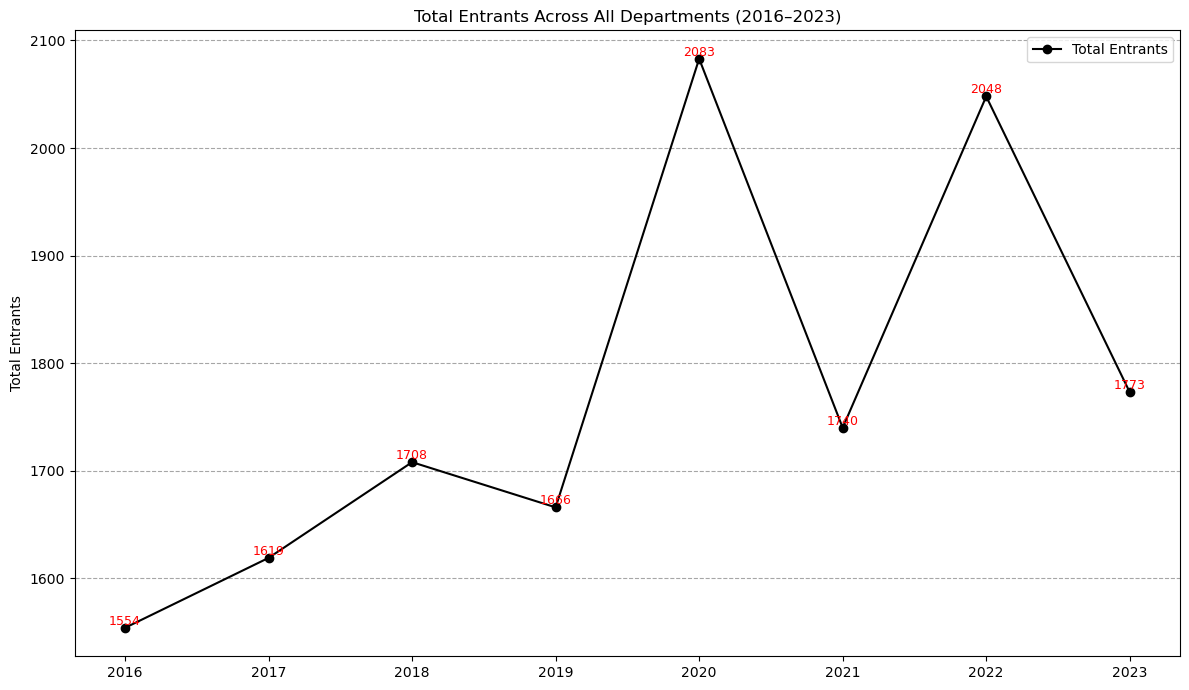

In [368]:
import numpy as np
import matplotlib.pyplot as plt

years = range(2016, 2024)
yearly_total_entrants = []

def safe_float(value):
    try:
        return float(str(value).replace(",", ""))
    except (ValueError, TypeError):
        return 0.0

for year in years:
    entrants_col = f"{year}_Entrants"
    current_year_entrants = 0.0

    if entrants_col in department_data_df.columns:
        current_year_entrants = department_data_df[entrants_col].apply(safe_float).sum()

    yearly_total_entrants.append(current_year_entrants)

fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(years, yearly_total_entrants, marker='o', label='Total Entrants', color='black')

for x, y in zip(years, yearly_total_entrants):
    ax.text(x, y, f"{int(y)}", ha='center', va='bottom', fontsize=9, color='red')

ax.set_ylabel('Total Entrants')
ax.set_title('Total Entrants Across All Departments (2016–2023)')
ax.set_xticks(list(years))
ax.legend()

ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.7)

fig.tight_layout()
plt.show()

The line graph illustrates the total number of entrants over the years which experiences two sudden drops. The first drop (2020 – 2021) was primarily due to the impact of COVID 19. The second drop (2022-2023) suggests a shift in higher education trends, with fewer individuals applying to university. This may be attributed to the growing availability of alternative pathways such as degree apprenticeships, which allow students to earn a degree while gaining work experience and avoiding tuition debt. Additionally, online bootcamps are providing targeted skills training, offering a more direct and cost-effective route into employment

## 3.2. Q1: Is there a change in the number of applicants and offer rates from LSE?

### 3.2.1. Applicants vs Offer Yearly Proportions

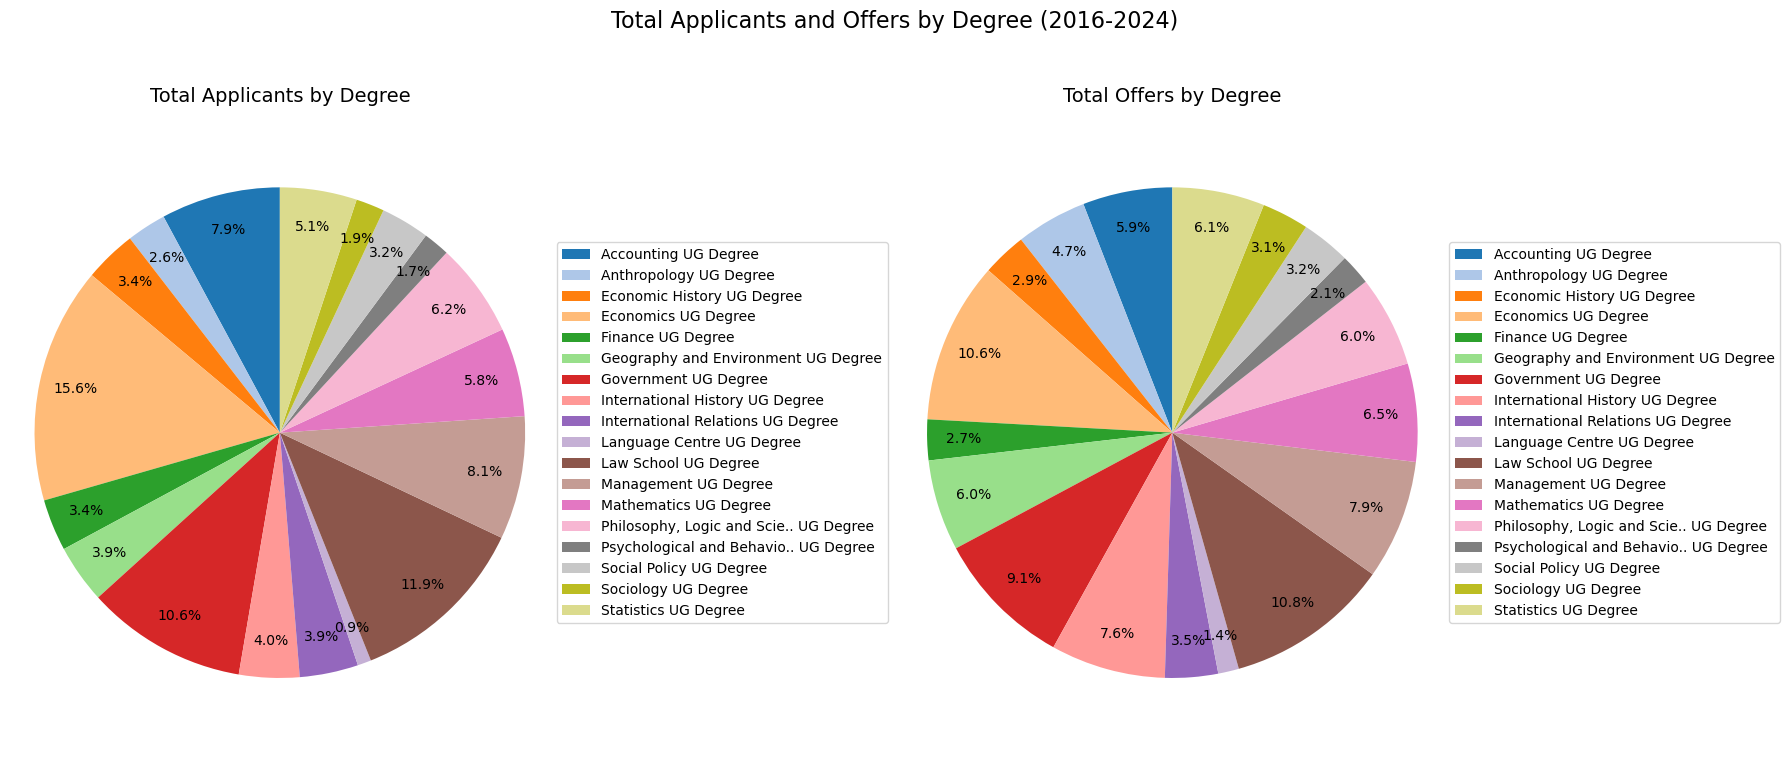

In [373]:
import matplotlib.pyplot as plt
import seaborn as sns

years = range(2016, 2025)

def safe_float(value):
    try:
        return float(str(value).replace(",", ""))
    except (ValueError, TypeError):
        return 0.0

total_applicants_by_degree = {}
total_offers_by_degree = {}
for year in years:
    
    apps_col = f"{year}_Apps"
    if apps_col in department_data_df.columns:
        total_applicants_by_degree_year = department_data_df.groupby('Department')[apps_col].sum()
        for degree, applicants in total_applicants_by_degree_year.items():
            if degree not in total_applicants_by_degree:
                total_applicants_by_degree[degree] = 0
            total_applicants_by_degree[degree] += safe_float(applicants)
            
    offers_col = f"{year}_Offers"
    if offers_col in department_data_df.columns:
        total_offers_by_degree_year = department_data_df.groupby('Department')[offers_col].sum()
        for degree, offers in total_offers_by_degree_year.items():
            if degree not in total_offers_by_degree:
                total_offers_by_degree[degree] = 0
            total_offers_by_degree[degree] += safe_float(offers)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Total Applicants and Offers by Degree (2016-2024)', fontsize=16)

labels_applicants = list(total_applicants_by_degree.keys())
sizes_applicants = list(total_applicants_by_degree.values())
colors_applicants = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
                  '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                  '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                  '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5',
                  '#a65628', '#f1a340', '#b2df8a', '#33a02c', '#fb9a99']

wedges1, texts1, autotexts1 = ax1.pie(
    sizes_applicants,
    colors=colors_applicants,
    startangle=90,
    autopct='%1.1f%%',
    pctdistance=0.85,               
    labeldistance=1.1,              
    textprops={'fontsize': 10}
)  

ax1.set_title('Total Applicants by Degree', fontsize=14)
ax1.axis('equal')
ax1.legend(wedges1, labels_applicants, loc='center left', bbox_to_anchor=(1, 0.5))

labels_offers = list(total_offers_by_degree.keys())
sizes_offers = list(total_offers_by_degree.values())
colors_offers = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
                  '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                  '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                  '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5',
                  '#a65628', '#f1a340', '#b2df8a', '#33a02c', '#fb9a99']

wedges2, texts2, autotexts2 = ax2.pie(
    sizes_offers,
    colors=colors_offers,
    startangle=90,
    autopct='%1.1f%%',
    pctdistance=0.85,            
    labeldistance=1.1,             
    textprops={'fontsize': 10}
) 

ax2.set_title('Total Offers by Degree', fontsize=14)
ax2.axis('equal')
ax2.legend(wedges2, labels_offers, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

By comparing the two charts we can see the proportion of applicants applying to which department and which departments are the most selective. By looking at the chart it seems most people apply to the economics department (15.6%), law school department (11.9%) and government department (10.6%). This probably due to the fact LSE is ranked always in the top 5 on the table for Complete University Guide for these departments. Additionally, these departments are closely associated for people targeting careers in finance and law. 

However, the proportion of offers doesn’t measure to the same percentage as the proportion of the applicants which indicates a highly competitive admission process. This suggests that many applicants to these popular departments are unlikely to receive offers.

In contrast, some departments have a higher offer percentage compared to total applicants for example for statistics (1% increase) and anthropology (2.1% increase). Each department has a large increase as not many people apply to it probably due to the career prospects leading them not being able to go into or harder to get career paths they desire. Another possible reason for the increase so they could help balance the overall distribution of students across departments. While programs like economics, law and government are oversubscribed, expanding space for students from anthropology and statistics enabling LSE to manage its overall student capacity. 


### 3.2.2. Departmental Offer Rates

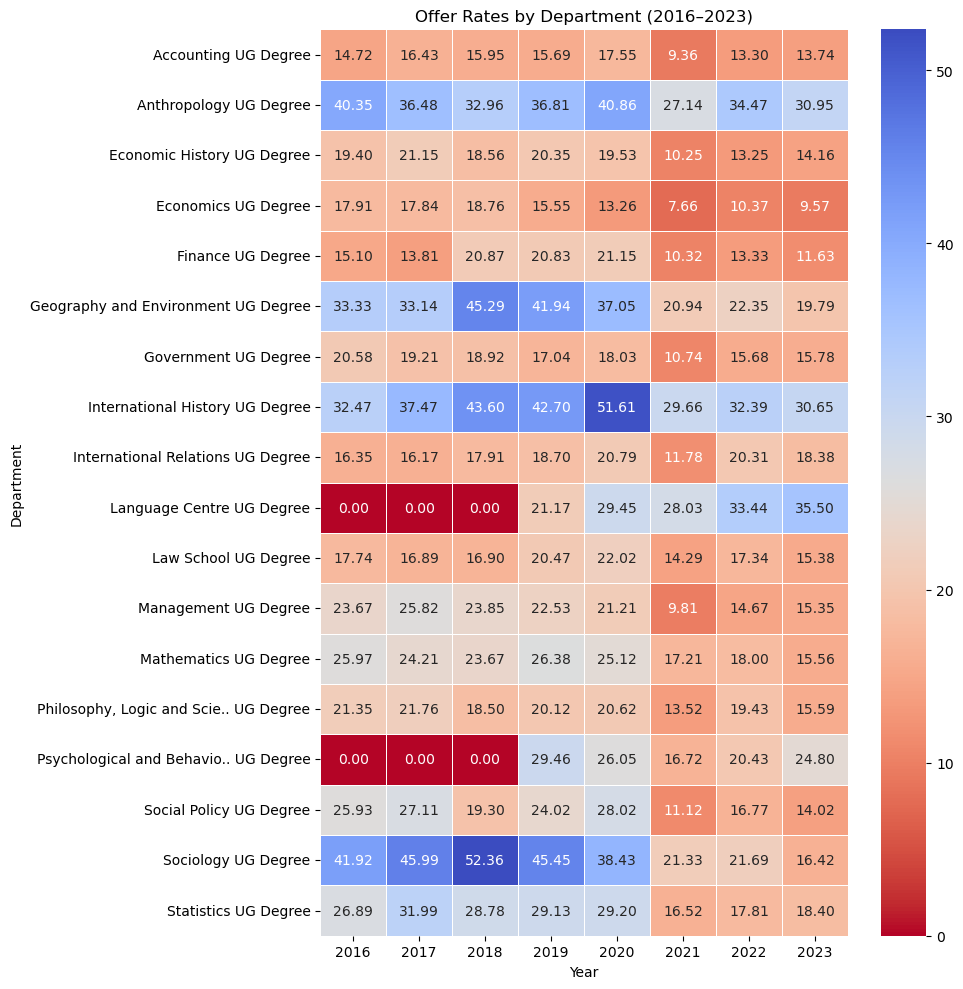

In [377]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def safe_float(value):
    try:
        return float(str(value).replace(",", ""))
    except (ValueError, TypeError):
        return 0.0

offer_rate_data = []

for index, row in department_data_df.iterrows():  
    rates = {}
    for year in range(2016, 2024):
        apps = safe_float(row[f"{year}_Apps"])
        offers = safe_float(row[f"{year}_Offers"])
        if apps > 0:
            rate = round((offers / apps) * 100, 2)
        else:
            rate = 0
        rates[year] = rate
    offer_rate_data.append(rates)  

heatmap_df = pd.DataFrame(offer_rate_data, index=department_data_df["Department"])
heatmap_df.columns.name = "Year"

plt.figure(figsize=(10, 10))
sns.heatmap(heatmap_df, annot=True, cmap="coolwarm_r", fmt=".2f", linewidths=0.5)
plt.title("Offer Rates by Department (2016–2023)")
plt.ylabel("Department")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

The heatmap illustrates the offer rates (%) across various departments from 2016 to 2023. Values that tend to have been redder indicate they have a lower offer rate while blue indicates they have a higher offer rate. Some departments have 0% as they didn’t exist in those years.

The Heat Map indicates that economics, government and law school all have lower offer rates shown by the heat map which is similar to what the pie chart show. However, departments such as sociology have experienced declining offer rates, with a significant drop observed since 2018. The most dramatic decrease occurred between 2020 and 2021, when the offer rate fell from 38.43% to 21.33%, and it has continued to decline since then. Sociology did however get a large increase from 2016 to 2018 possibly due to the reason of students becoming more interested in inequality, race and gender where protests (Black Lives Matter) have greatly influenced their decision. Between 2020 and 2021, every department at LSE saw a drastic decline in offer rates, largely due to the impact of the COVID-19 pandemic. During this period, A-Level grades were awarded based on teacher assessments, which led to grade inflation. As a result, LSE looked more cautiously when approaching these applications. The bar chart below illustrates the number of applicants and offers during this period, highlighting a significant drop in offers from 2020 to 2021, which reflects the impact of the pandemic


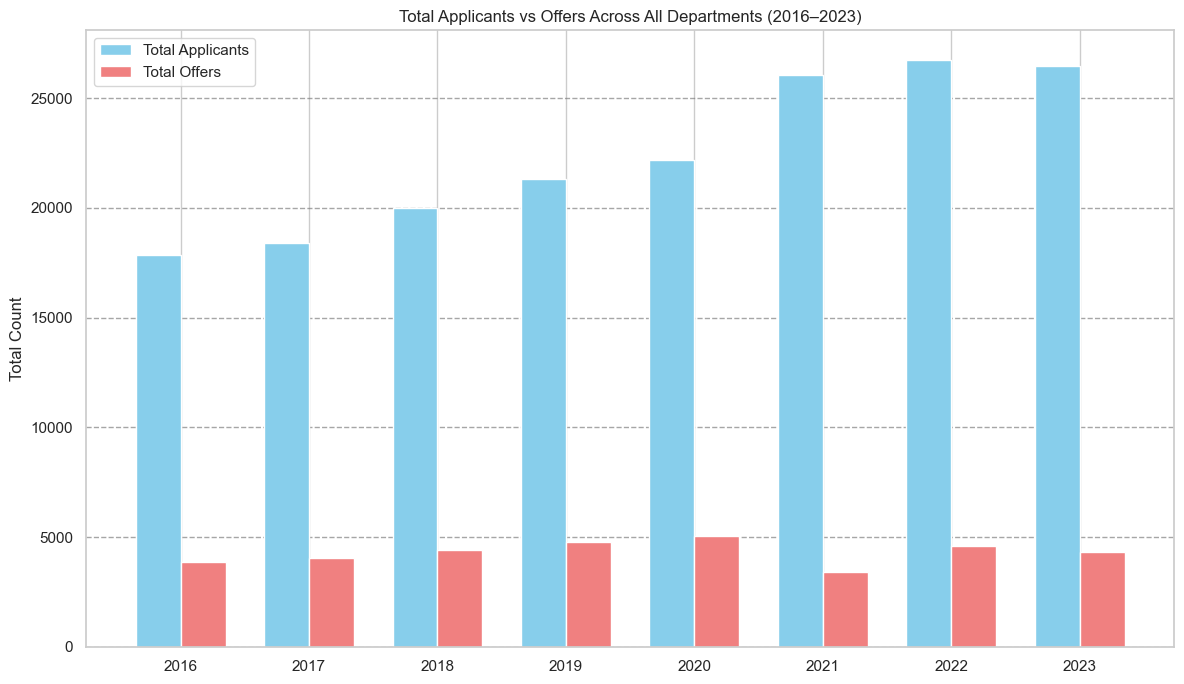

In [179]:
import numpy as np

years = range(2016, 2024)
yearly_total_apps = []
yearly_total_offers = []


def safe_float(value):
    try:
        return float(str(value).replace(",", ""))
    except (ValueError, TypeError):
        return 0.0

for year in years:
    apps_col = f"{year}_Apps"
    offers_col = f"{year}_Offers"
    current_year_apps = 0.0
    current_year_offers = 0.0
    
    for val in department_data_df[apps_col]:
        current_year_apps += safe_float(val)

    if apps_col in department_data_df.columns:
        current_year_apps = department_data_df[apps_col].apply(safe_float).sum()

    if offers_col in department_data_df.columns:
        current_year_offers = department_data_df[offers_col].apply(safe_float).sum()

    yearly_total_apps.append(current_year_apps)
    yearly_total_offers.append(current_year_offers)

num_years = len(years)
x = np.arange(num_years)  
width = 0.35 

fig, ax = plt.subplots(figsize=(12, 7))

rects1 = ax.bar(x - width/2, yearly_total_apps, width, label='Total Applicants', color='skyblue')

rects2 = ax.bar(x + width/2, yearly_total_offers, width, label='Total Offers', color='lightcoral')

ax.set_ylabel('Total Count')
ax.set_title('Total Applicants vs Offers Across All Departments (2016–2023)')
ax.set_xticks(x)
ax.set_xticklabels([str(year) for year in years]) 
ax.legend()

ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.7)

fig.tight_layout() 
plt.show()

## 3.3. Q2: How has the overall dropout rate at LSE changed over time?

This section uses data about the course name, 1st year, 2nd year and final year numbers for years 2017-2023. These graphs can be used to analyse how the drop out rates have changed over the years so LSE can see if changes made have made a difference. They can also use this to improve support at the university for the students.

In [109]:
combined_student_data_df.head()

,Course name,1st Year,2nd Year,Final Year,Total,Year
0,BSc in Accounting and Finance,136.0,134.0,114.0,384.0,2017
1,BSc in Actuarial Science,67.0,70.0,87.0,224.0,2017
2,BA in Anthropology and Law,14.0,15.0,16.0,45.0,2017
3,BSc in Business Mathematics and Statistics,22.0,34.0,32.0,88.0,2017
4,BSc in Econometrics and Mathematical Economics,0.0,0.0,1.0,1.0,2017


### 3.3.1. Fetching data for overall dropout rates

Here I use SQL to select the number of students from 1st year 2nd year and final year and compare this to total students to get the dropout rates over the years

In [111]:
import sqlite3
import pandas as pd

years = [2017, 2018, 2019, 2020, 2021, 2022, 2023]
total_dropouts = []

connection = sqlite3.connect("student_table.db")
combined_student_data_df.to_sql("student_table", connection, if_exists="replace", index=False)
cursor = connection.cursor()

for x in range(0,len(years)):
    if x != len(years) - 1:
        
        cursor.execute('SELECT SUM ("1st Year") FROM student_table WHERE Year = ?', (years[x],))
        result1 = cursor.fetchall()[0][0]
        
        cursor.execute('SELECT SUM ("2nd Year") FROM student_table WHERE Year = ?', (years[x+1],))
        result2 = cursor.fetchall()[0][0]

        cursor.execute('SELECT SUM ("2nd Year") FROM student_table WHERE Year = ?', (years[x],))
        result3 = cursor.fetchall()[0][0]
        
        cursor.execute('SELECT SUM ("Final Year") FROM student_table WHERE Year = ?', (years[x+1],))
        result4 = cursor.fetchall()[0][0]

        value = ((result1-result2)+(result3-result4))/(result1+result3)*100
        total_dropouts.append(round(value,4))


cursor.close()
connection.close()

print(total_dropouts)


[0.3758, 0.6779, 1.4455, 2.4754, 4.5702, 5.5122]


### 3.3.2. Plotting the overall drop out rate at LSE from 2017 to 2023

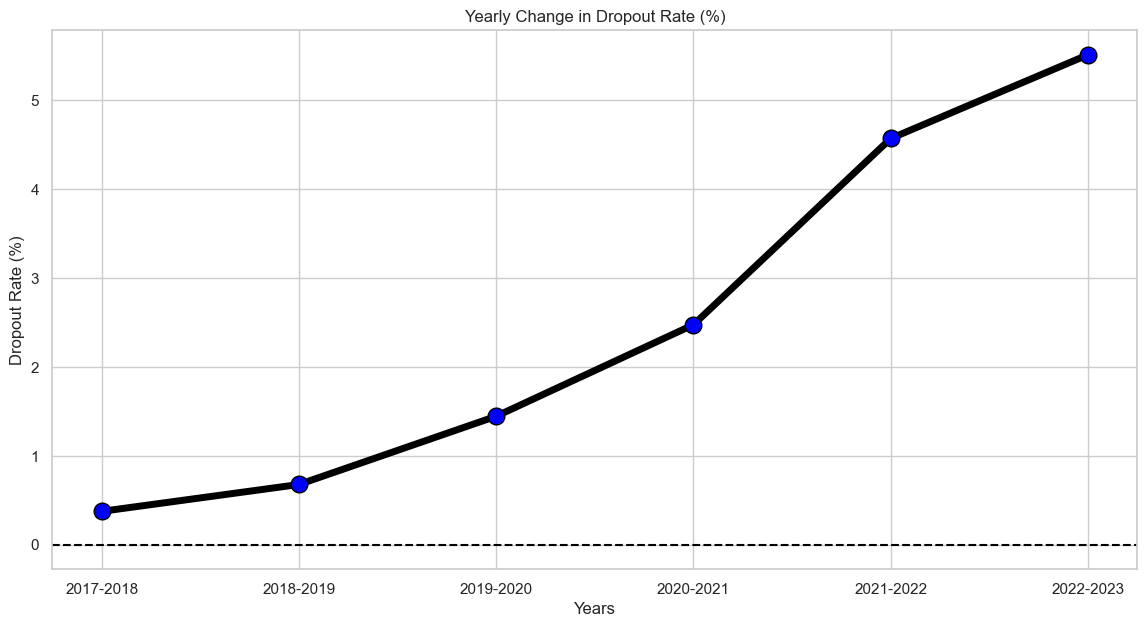

In [113]:
import matplotlib.pyplot as plt

between_years = ["2017-2018","2018-2019","2019-2020","2020-2021","2021-2022","2022-2023"]
plt.figure(figsize=(14, 7))
plt.axhline(0, color="black", linestyle="--")  

plt.plot(between_years, total_dropouts, marker="o", markerfacecolor = "blue", markersize=12, linestyle="-", linewidth = 5, color="black", label="Dropout Rate Change (%)")

plt.title("Yearly Change in Dropout Rate (%)")
plt.xlabel("Years")
plt.ylabel("Dropout Rate (%)")

plt.show()

Here I fetch data between 1st year and 2nd year and found the dropout rates

In [114]:
years = [2017, 2018, 2019, 2020, 2021, 2022, 2023]
dropouts_1st_to_2nd = []

connection = sqlite3.connect("student_table.db")
combined_student_data_df.to_sql("student_table", connection, if_exists="replace", index=False)
cursor = connection.cursor()

for x in range(0,len(years)):
    if x != len(years) - 1:
        
        cursor.execute('SELECT SUM ("1st Year") FROM student_table WHERE Year = ?', (years[x],))
        result1 = cursor.fetchall()[0][0]
        
        cursor.execute('SELECT SUM ("2nd Year") FROM student_table WHERE Year = ?', (years[x+1],))
        result2 = cursor.fetchall()[0][0]
        
        value = ((result1-result2)/(result1)) * 100
        dropouts_1st_to_2nd.append(round(value,4))

cursor.close()
connection.close()

print(dropouts_1st_to_2nd)

[-3.6852, -2.4235, 1.4252, 0.6199, -0.7357, 14.2304]


### 3.3.3. Ploting the change in dropout rates between 1st and 2nd year from 2017-2023

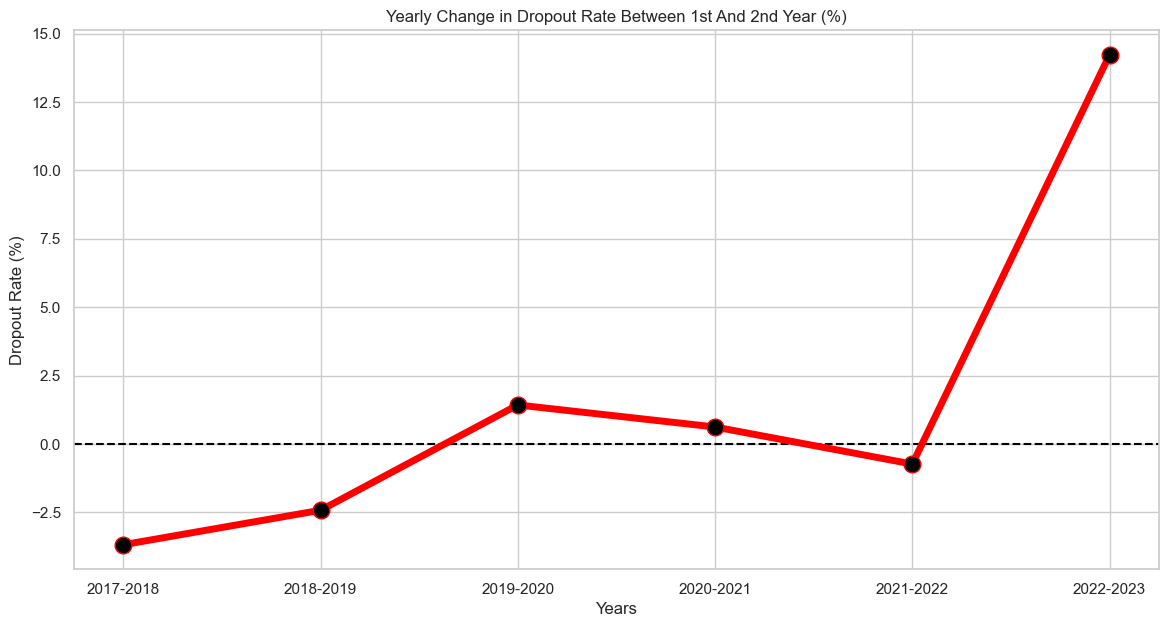

In [117]:
import matplotlib.pyplot as plt

between_years = ["2017-2018","2018-2019","2019-2020","2020-2021","2021-2022","2022-2023"]
plt.figure(figsize=(14, 7))
plt.axhline(0, color="black", linestyle="--")  

plt.plot(between_years, dropouts_1st_to_2nd, marker="o", markerfacecolor = "black", markersize=12, linestyle="-", linewidth = 5, color="red", label="Dropout Rate Change (%)")

plt.title("Yearly Change in Dropout Rate Between 1st And 2nd Year (%)")
plt.xlabel("Years")
plt.ylabel("Dropout Rate (%)")

plt.show()

Here I fetch data between 1st year and 2nd year and found the dropout rates

In [118]:
dropouts_2nd_to_Final = []
connection = sqlite3.connect("student_table.db")
combined_student_data_df.to_sql("student_table", connection, if_exists="replace", index=False)
cursor = connection.cursor()

for x in range(0,len(years)):
    if x != len(years) - 1:
        
        cursor.execute('SELECT SUM ("2nd Year") FROM student_table WHERE Year = ?', (years[x],))
        result1 = cursor.fetchall()[0][0]
        
        cursor.execute('SELECT SUM ("Final Year") FROM student_table WHERE Year = ?', (years[x+1],))
        result2 = cursor.fetchall()[0][0]

        value = ((result1-result2)/(result1)) * 100
        dropouts_2nd_to_Final.append(round(value,4))

cursor.close()
connection.close()

print(dropouts_2nd_to_Final)

[4.4598, 3.9157, 1.4648, 4.8193, 9.0691, -4.6067]


### 3.3.4. Ploting the change in dropout rates between 2nd and final year from 2017-2023

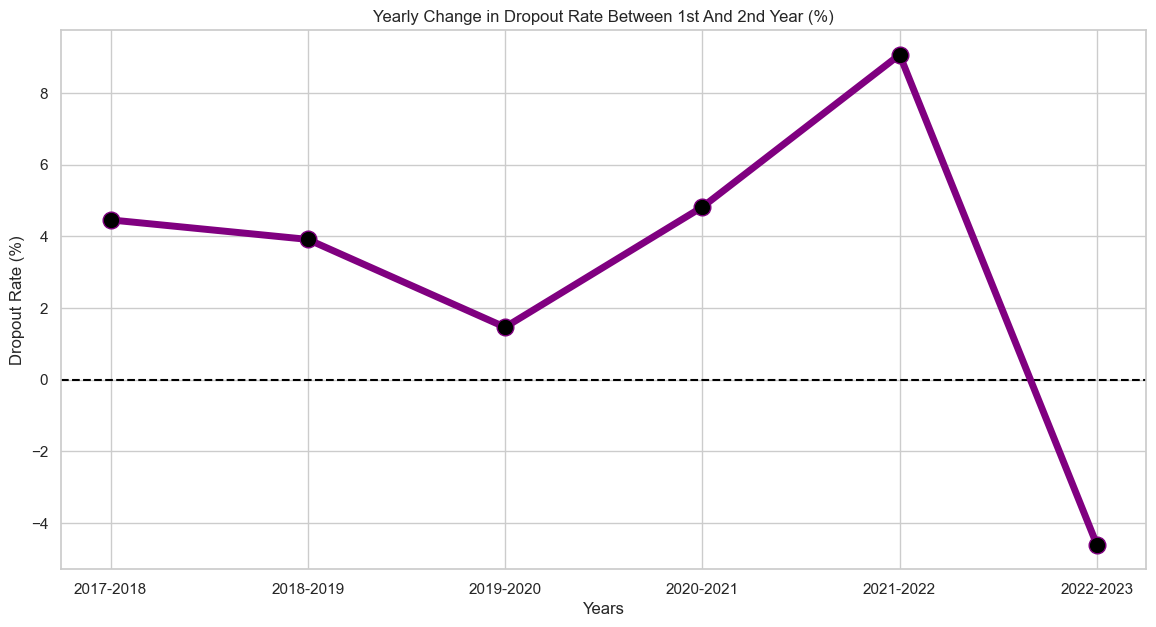

In [121]:
import matplotlib.pyplot as plt

between_years = ["2017-2018","2018-2019","2019-2020","2020-2021","2021-2022","2022-2023"]
plt.figure(figsize=(14, 7))
plt.axhline(0, color="black", linestyle="--")  

plt.plot(between_years, dropouts_2nd_to_Final, marker="o", markerfacecolor = "black", markersize=12, linestyle="-", linewidth = 5, color="purple", label="Dropout Rate Change (%)")

plt.title("Yearly Change in Dropout Rate Between 1st And 2nd Year (%)")
plt.xlabel("Years")
plt.ylabel("Dropout Rate (%)")

plt.show()

### 3.3.5. Getting data for the course drop out rates

Here I create a function to get the number of dropouts between years for all courses. It will return dropouts between first and second year if the parameter num is 1 or will return dropouts between second and final year if the parameter num is 2. It returns a dictionary with course name and number of dropouts.

In [122]:
import numpy as np

def get_dropouts(year1,year2,num):
    connection = sqlite3.connect("student_table.db")
    combined_student_data_df.to_sql("student_table", connection, if_exists="replace", index=False)
    cursor = connection.cursor()
    
    if num == 1:
        cursor.execute('SELECT ("Course Name"),("1st Year")  FROM student_table WHERE Year = ?',(year1,))
        dropouts1 = cursor.fetchall()
        cursor.execute('SELECT ("Course Name"),("2nd Year")  FROM student_table WHERE Year = ?',(year2,))
        dropouts2 = cursor.fetchall()

    if num == 2:
        cursor.execute('SELECT ("Course Name"),("2nd Year")  FROM student_table WHERE Year = ?',(year1,))
        dropouts1 = cursor.fetchall()
        cursor.execute('SELECT ("Course Name"),("Final Year")  FROM student_table WHERE Year = ?',(year2,))
        dropouts2 = cursor.fetchall()

    cursor.close()
    connection.close()
    
    dict1 = dict(dropouts1)
    dict2 = dict(dropouts2)

    diffs = []
    for course in dict1:
        if course in dict2:
            diff = dict2[course] - dict1[course]
            diffs.append((course, diff))
            
    return diffs

This function fetches the total students for all courses in the list of courses passed and returns a dictionary with the course and total count.

In [125]:
def get_total_dropouts(list):
    dictionary_total = {}
    for year in list:
        for course,count in year:
            if course in dictionary_total:
                dictionary_total[course] += count
            else:
                dictionary_total[course] = count
        
    return dictionary_total

This function returns the number of students per course in the dictionary so that we can calculate the drop out rates.

In [127]:
def get_total_students_per_course(dict,num):
    total_students_dict = {}
    connection = sqlite3.connect("student_table.db")
    combined_student_data_df.to_sql("student_table", connection, if_exists="replace", index=False)
    cursor = connection.cursor()
    
    for course in dict.keys():
        if num == 1:
            cursor.execute('SELECT SUM ("1st Year") FROM student_table WHERE ("Course Name") = ? AND Year != 2023',(course,))
            total = cursor.fetchall()[0][0]

        if num == 2:
            cursor.execute('SELECT SUM ("2nd Year") FROM student_table WHERE ("Course Name") = ? AND Year != 2023',(course,))
            total = cursor.fetchall()[0][0]
            
        total_students_dict[course] = total

    cursor.close()
    connection.close()
    
    filtered_dict = {}
    for key, value in total_students_dict.items():
        if value != 0:
            filtered_dict[key] = value
            
    return filtered_dict

This function sorts the dictionary for the bar charts we will plot

In [129]:
def sort_dict_desc(dict):
    values = list(dict.items())

    for x in range(0,len(values)):
        highest_index = x
        for y in range(highest_index+1,len(values)):
            if values[y][1] > values[highest_index][1]:
                highest_index = y
        temp = values[x]
        values[x] = values[highest_index]
        values[highest_index] =  temp
        
    result = {}
    for key, value in values:
        result[key] = value
    return result
    

This finds the drop out rate per course from first and second year and sorts the dictionary into descending order

In [131]:
years = [2017, 2018, 2019, 2020, 2021, 2022, 2023]

courses_1st_to_2nd = []
for x in range(0,len(years)):
    if x != len(years) - 1:
        courses_1st_to_2nd.append(get_dropouts(years[x],years[x+1],1))
        
average_dropouts_dict = get_total_dropouts(courses_1st_to_2nd)
total_students_per_course = get_total_students_per_course(average_dropouts_dict,1)

drop_out_rate_per_course = {}
for course in total_students_per_course.keys():
    drop_out_rate_per_course[course] = round((average_dropouts_dict[course]/total_students_per_course[course])*100,5)

first_to_second_course_dict = sort_dict_desc(drop_out_rate_per_course)
    


### 3.3.6. Ploting the top 10 courses with the highest drop out rates

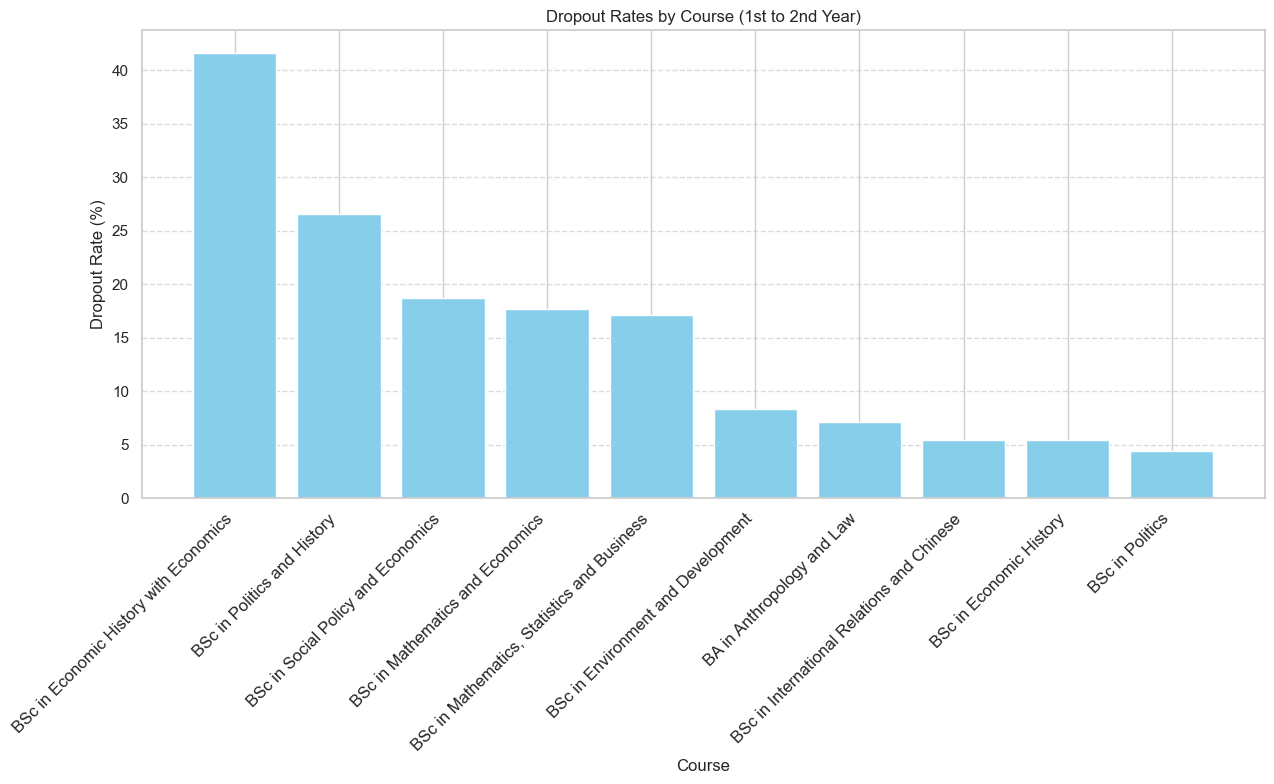

In [133]:
first_10 = dict(list(first_to_second_course_dict.items())[:10])

courses = list(first_10.keys())
rates = list(first_10.values())

plt.figure(figsize=(13,8))
plt.bar(courses, rates, color="skyblue")

plt.xticks(rotation=45, ha='right', fontsize=12)

plt.title("Dropout Rates by Course (1st to 2nd Year)")
plt.xlabel("Course")
plt.ylabel("Dropout Rate (%)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()


plt.show()

This finds the drop out rate per course from second to final year and sorts the dictionary into descending order

In [160]:
years = [2017, 2018, 2019, 2020, 2021, 2022, 2023]

courses_1st_to_2nd = []
for x in range(0,len(years)):
    if x != len(years) - 1:
        courses_1st_to_2nd.append(get_dropouts(years[x],years[x+1],2))
        
average_dropouts_dict = get_total_dropouts(courses_1st_to_2nd)
total_students_per_course = get_total_students_per_course(average_dropouts_dict,2)

drop_out_rate_per_course = {}
for course in total_students_per_course.keys():
    drop_out_rate_per_course[course] = round((average_dropouts_dict[course]/total_students_per_course[course])*100,5)
    
second_to_final_course_dict = sort_dict_desc(drop_out_rate_per_course)

### 3.3.7. Ploting the top 10 courses with the highest drop out rates from 2nd to final year

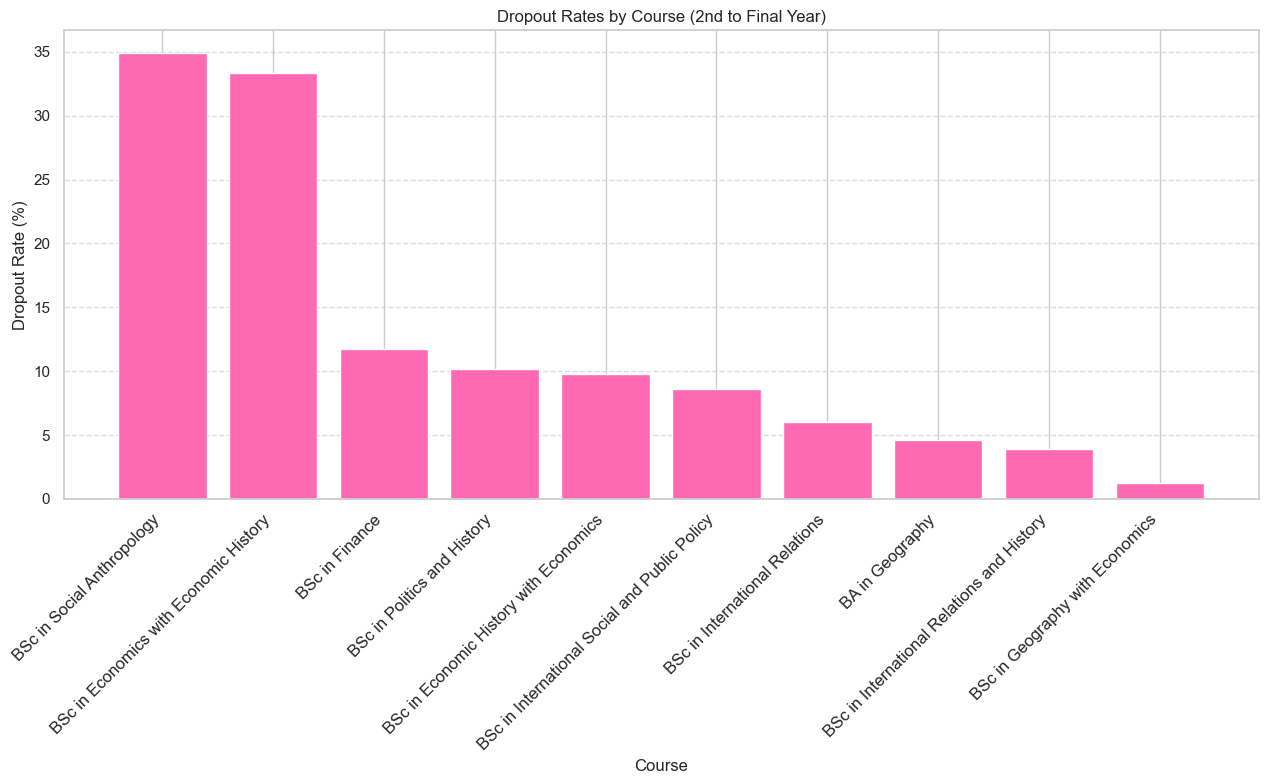

In [137]:
first_10 = dict(list(second_to_final_course_dict.items())[:10])

courses = list(first_10.keys())
rates = list(first_10.values())

plt.figure(figsize=(13,8))
plt.bar(courses, rates, color="hotpink")

plt.xticks(rotation=45, ha='right', fontsize=12)

plt.title("Dropout Rates by Course (2nd to Final Year)")
plt.xlabel("Course")
plt.ylabel("Dropout Rate (%)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()


plt.show()

#### Limitations: 
* Data does not take into account students moving between courses.
* The data analyses the difference in students between years, therefore if students join a course between years it may course data to be skewed.

## 3.4. Q3: Is there a correlation between the number of staff members and enrolment in LSE?

### 3.4.1. LSE Enrollment Overview: Top 10 Departments


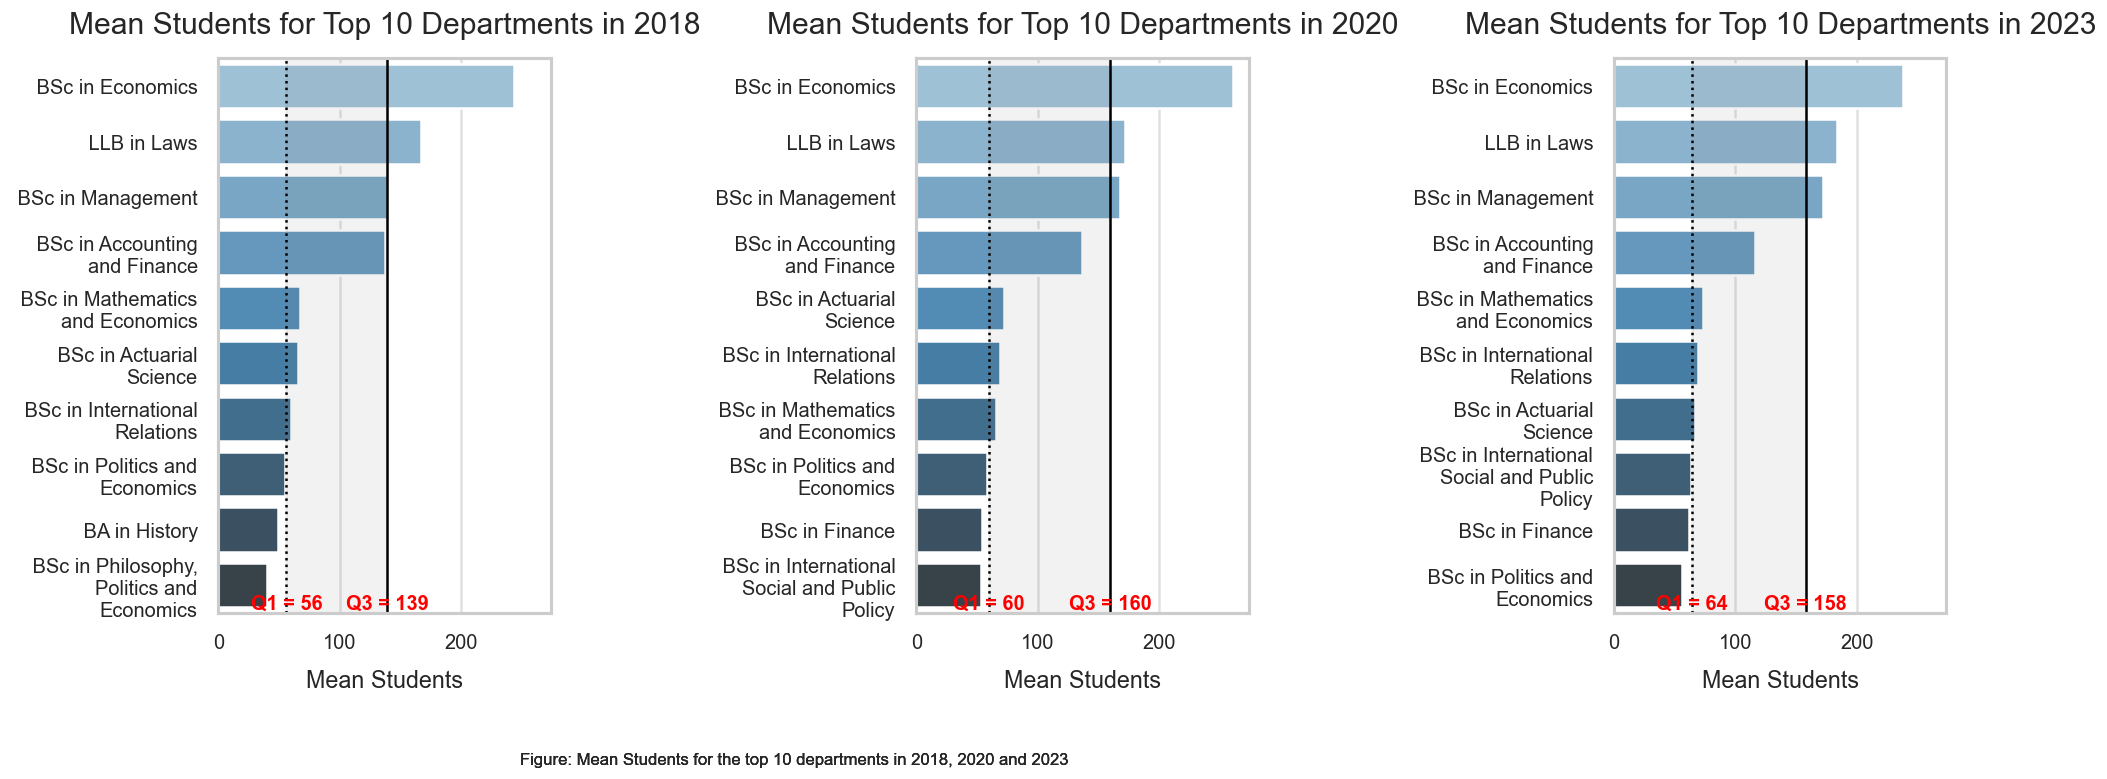

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("talk", font_scale=1.2)

years = [2018, 2020, 2023]


fig, axes = plt.subplots(1, 3, figsize=(24, 6), dpi=120, sharex=True)
fig.subplots_adjust(left=0.30, wspace=1.1)

def text_to_lines(department, width=20):
    words = department.split()
    lines = []
    current = ""
    for word in words:
        if len(current) + len(word) <= width:
            current += (" " + word)
        else:
            lines.append(current)
            current = word
    lines.append(current)
    department_title_lines = "\n".join(lines)
    return department_title_lines

for i, year in enumerate(years):
    df = student_data[year].sort_values('Mean', ascending=False).head(10)
    
    
    df['Course name'] = df['Course name'].apply(text_to_lines)
    
    ax = axes[i]
    sns.barplot(x='Mean', y='Course name', data=df, ax=ax, palette="Blues_d")
    q1 = int(df['Mean'].quantile(0.25).round(0))
    q3 = int(df['Mean'].quantile(0.75).round(0))
    
    ax.axvline(q1, color='black', linestyle=':', linewidth=1.5)
    ax.axvline(q3, color='black', linestyle='-',  linewidth=1.5)
    ax.axvspan(q1, q3, color='gray', alpha=0.1)
    
    min_y, _ = ax.get_ylim()
    
    ax.text(q1, min_y,f"Q1 = {q1}",ha='center', va='bottom',fontsize=12,color="red",fontweight='bold')
    ax.text(q3, min_y,f"Q3 = {q3}",ha='center', va='bottom',fontsize=12,color="red",fontweight='bold')
    
    ax.set_title(f"Mean Students for Top 10 Departments in {year}",fontsize=18,pad=15)
    ax.set_xlabel("Mean Students",fontsize=14,labelpad=10)
    ax.set_ylabel("")              
    
    ax.grid(axis='x', linestyle='-', alpha=0.6)
    ax.tick_params(axis='y', labelsize=12) 
    ax.tick_params(axis='x', labelsize=12)  
    plt.figtext(0.5, -0.1,"Figure: Mean Students for the top 10 departments in 2018, 2020 and 2023",wrap=True,fontsize=10,ha="center")
plt.show()


### 3.4.2. Staffing Trends Over Time and Key Year Comparisons (2018, 2020, 2023)

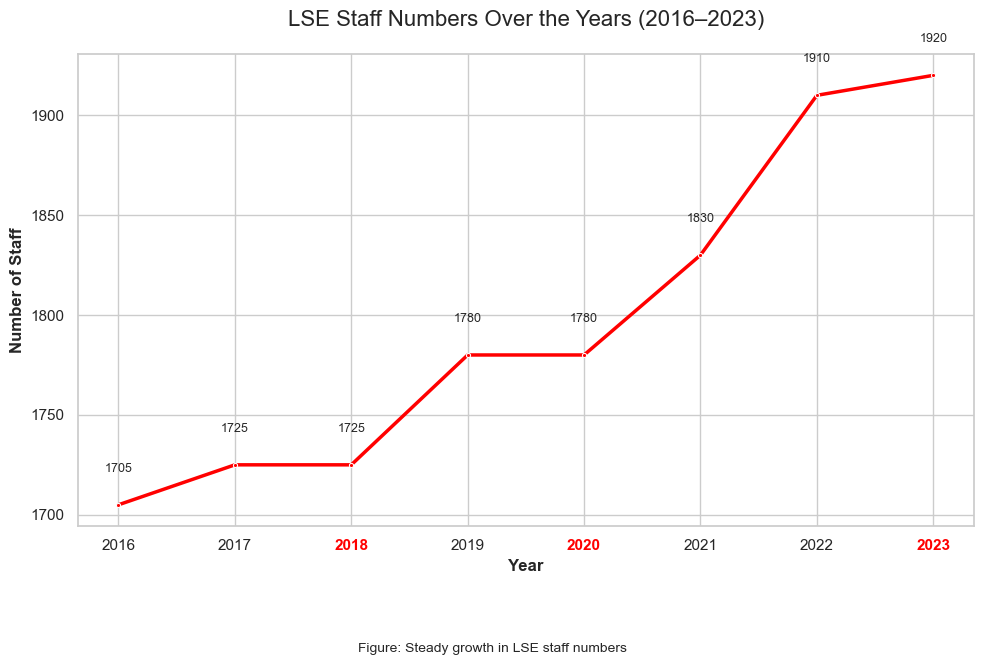

In [103]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='year', y='staff_count', data=lse_staff_df,marker = ".", linewidth=2.5,color="red")
year_count_tuple = zip(lse_staff_df['year'], lse_staff_df['staff_count'])
for x, y in year_count_tuple:
    ax.text(x, y + 15, str(y), ha='center', va='bottom', fontsize=9)
    
ax.set_title("LSE Staff Numbers Over the Years (2016–2023)", fontsize=16, pad=20)
ax.set_xlabel("Year", fontsize=12,fontweight ="bold")
ax.set_ylabel("Number of Staff", fontsize=12, fontweight ="bold")
min_y, max_Y = ax.get_ylim()
plt.figtext(0.5, -0.1,"Figure: Steady growth in LSE staff numbers",wrap=True,fontsize=10,ha="center")
for label in ax.get_xticklabels():
    if label.get_text() in ['2018', '2020', '2023']:
        label.set_color('red')    
        label.set_fontweight('bold')
plt.tight_layout()
plt.show()


# Conclusion

# References